# Тасболат Ердәулет СИБ-2301
## Зертханалық жұмыс

### Кітапханаларды импорттау:
### "D:/My files/PyCharm Projects/Neuron/lab7" Каталогындағы файлдардың тізімін көрсетеміз

In [7]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("D:/My files/PyCharm Projects/Neuron/lab7"))

['sample_submission.csv', 'test.csv', 'train.csv']


#### Деректер жиынтығын жүктеу. Бұл бөлімде біз деректерді жүктейміз және визуализациялаймыз.

In [9]:
# train корпусын оқимыз
train = pd.read_csv("D:/My files/PyCharm Projects/Neuron/lab7/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# test корпусын оқимыз
test= pd.read_csv("D:/My files/PyCharm Projects/Neuron/lab7/train.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# y_train айнымалысына меткаларды,'label' орнатамыз
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

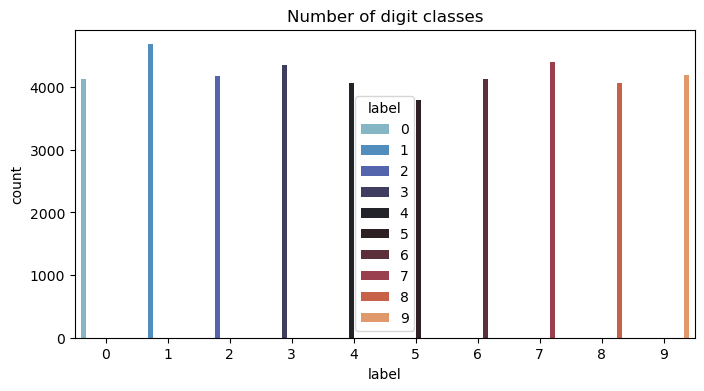

In [28]:
# Визуализация числа различных классов
plt.figure(figsize=(8,4))
g = sns.countplot(x=Y_train, palette="icefire", hue=Y_train)
plt.title("Number of digit classes")
Y_train.value_counts()

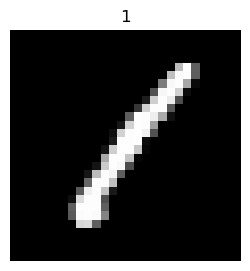

In [31]:
img = X_train.iloc[0].values
img = img.reshape((28, 28))
plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[0, 0])
plt.axis("off")
plt.show()

### Бұл код деректер жиынындағы 3-ші үлгіге (индекс 3) сәйкес келетін суретті көрсетеді.

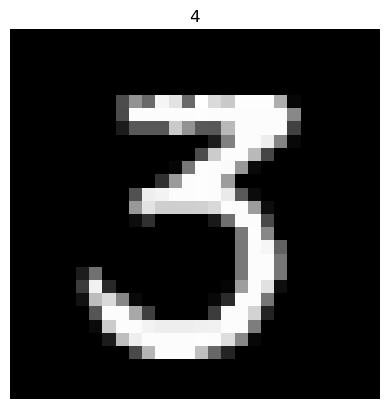

In [66]:
img = X_train[3]
img = img.reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[3, 0])
plt.axis("off")
plt.show()

### Белгілерді, меткаларды қалыпқа келтіру, пішінін өзгерту және кодтау
### Егер біз қалыпқа келтірсек, CNN тезірек жұмыс істейді.
### Біз барлық деректерді 28х28х1 өлшемді 3D матрицаларға түрлендіреміз.

In [40]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [41]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [42]:
# Кодирование меток 
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

### Train Test  деп Dataset бөлеміз

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


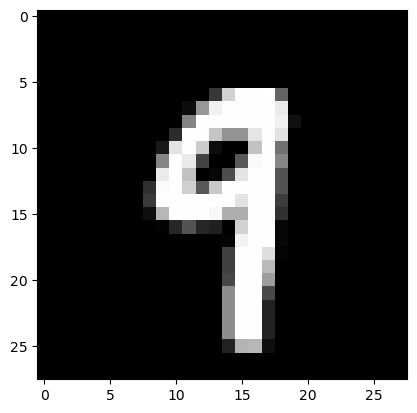

In [44]:
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [45]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1))) # Добавление слоя сверточной нейронной сети с параметрами.
model.add(MaxPool2D(pool_size=(2,2))) # Добавление слоя максимальной пуллинга.
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25)) # Добавление слоя исключения нейронов с вероятностью 0.25.
# fully connected
model.add(Flatten()) # Преобразование данных в одномерный массив.
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax")) # Добавление полносвязного слоя с 10 нейронами и функцией активации "softmax".

In [46]:
# Оптимизаторды анықтау
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

### Модельді құрастыру
### Біз алдыңғы бөліктерде және машиналық оқыту нұсқаулығында екілік кросс энтропиясын жасаймыз
### Қазіргі уақытта біз категориялық кросс-энтропияны қолданамыз. Бұл бізде көп класс бар дегенді білдіреді.

In [47]:
# Модельді құрастыру
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

### Эпохалар және пакеттер мөлшері

In [48]:
epochs = 10  # жақсы нәтиже алу үшін epochs санын көбейтеміз
batch_size = 250

### Деректер көлемін ұлғайтамыз

In [49]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,  # өлшемдерді азайту
        rotation_range=5,
        zoom_range = 0.1, # Кескінді ерікті түрде үлкейту 10%
        width_shift_range=0.1,
        height_shift_range=0.1,  # кескіндерді тігінен кездейсоқ жылжыту 10%
        horizontal_flip=False,
        vertical_flip=False)  # суреттерді кездейсоқ аудару-вертикалды
datagen.fit(X_train)

### Модельді орындаймыз

In [50]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 24s 140ms/step - loss: 1.0277 - accuracy: 0.6587 - val_loss: 0.1916 - val_accuracy: 0.9450
Epoch 2/10
151/151 [==============================] - 19s 126ms/step - loss: 0.3969 - accuracy: 0.8749 - val_loss: 0.1300 - val_accuracy: 0.9626
Epoch 3/10
151/151 [==============================] - 22s 148ms/step - loss: 0.2950 - accuracy: 0.9061 - val_loss: 0.0918 - val_accuracy: 0.9729
Epoch 4/10
151/151 [==============================] - 25s 167ms/step - loss: 0.2462 - accuracy: 0.9244 - val_loss: 0.0838 - val_accuracy: 0.9733
Epoch 5/10
151/151 [==============================] - 24s 157ms/step - loss: 0.2183 - accuracy: 0.9328 - val_loss: 0.0722 - val_accuracy: 0.9788
Epoch 6/10
151/151 [==============================] - 23s 155ms/step - loss: 0.1975 - accuracy: 0.9392 - val_loss: 0.0649 - val_accuracy: 0.9800
Epoch 7/10
151/151 [==============================] - 24s 160ms/step - loss: 0.1763 - accuracy: 0.9452 - val_loss: 0.0603 - val_ac

### Модельді бағалаймыз

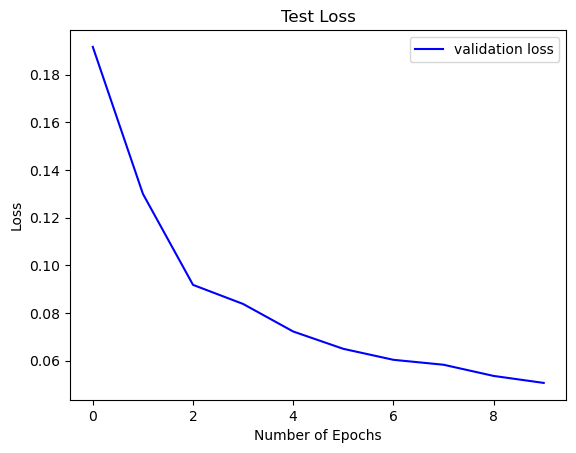

In [51]:
# Построили кривые потери и точности для обучения и валидации
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 1s 6ms/step


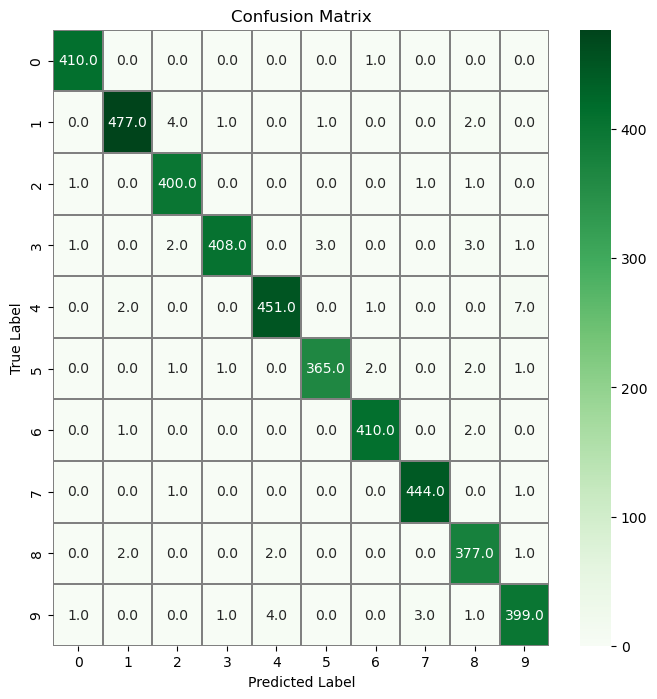

In [52]:
# confusion matrix
import seaborn as sns
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_val,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()